# NLP - Text Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Checking if is there any missing values and removing it from the dataset**

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
df.dropna(inplace=True)

**Checking to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string.**

In [6]:
df = df[df['review'].str.isspace()==False]

**Checking the value counts per label**

In [7]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**What are the top 20 words (that are not english stop words) per label type?**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df_neg = df[df['label']=='neg']
df_pos = df[df['label']=='pos']

In [10]:
def print_top_20_words(df):
    count_vectorizer = CountVectorizer(stop_words='english')
    
    matrix = count_vectorizer.fit_transform(df['review'])
    frequencies = zip(count_vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])

    # sort from largest to smallest
    words = sorted(frequencies, key=lambda x: -x[1])[:20]

    return words

In [11]:
print('Top 20 words used for Negative reviews')
print(print_top_20_words(df_neg))

Top 20 words used for Negative reviews
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [12]:
print('Top 20 words used for Positive reviews')
print(print_top_20_words(df_pos))

Top 20 words used for Positive reviews
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Training the model

**Create X and y**

In [13]:
X = df['review']

In [14]:
y = df['label']

**Train | Test Split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Creating a Pipeline with TF-IDF and the model**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [18]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('nb', MultinomialNB())])

In [19]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [20]:
svc_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                         ('svc', SVC())])

In [21]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

**Model Evaluation**

In [22]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [23]:
def report(model):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    plot_confusion_matrix(model, X_test, y_test)

*Naive Bayes Performance*

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



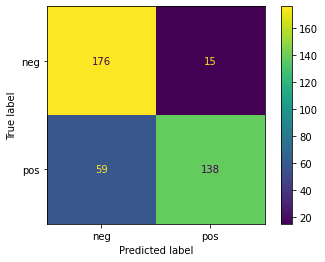

In [24]:
report(nb_pipeline)

*Support Vector Machine Performance*

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       191
         pos       0.85      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



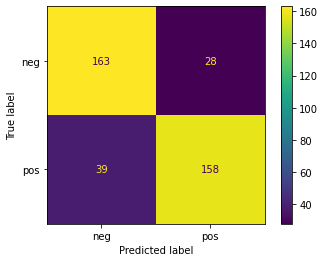

In [25]:
report(svc_pipeline)